# Machine Learning Linear regression assignments 

## Ex 1. Data:
1. Download the MPG data file from UCI Machine Learning repository
https://archive.ics.uci.edu/ml/machine-learningdatabases/auto-mpg/
2. Identify target variable and independent variable.
3. Prepare the data file 


In [1]:
import pandas as pd


In [2]:
auto=pd.read_csv('auto-mpg.data')

In [3]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
auto.shape

(398, 9)

In [5]:
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
auto1=pd.DataFrame(auto,columns=['mpg','acceleration'])

In [8]:
auto1.head()

,mpg,acceleration
0,18.0,12.0
1,15.0,11.5
2,18.0,11.0
3,16.0,12.0
4,17.0,10.5


# Univariate Regression

## Ex 2. Import relevant python libraries and sklearn linear_model

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, model_selection
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline


## Ex 3. Split the file into train [80%] and test [20%] data

In [10]:
X=np.array(auto1['acceleration']).reshape(-1,1) 
y=np.array(auto1['mpg'])

In [11]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2)

## Ex 4. Apply linear regression

In [12]:
lrg=linear_model.LinearRegression()

## Ex 5. Train the model using the training sets

In [13]:
lrg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Ex 6. Display the coefficients coef, intercept and residues

In [14]:
print("Coefficient :", format(lrg.coef_))

Coefficient : [1.15045794]


In [15]:
print("Intercept :", format(lrg.intercept_))

Intercept : 5.300848733515338


## Ex 7.Predict using test data 

In [16]:
y_pred=lrg.predict(X_train)

Text(0, 0.5, 'Index')

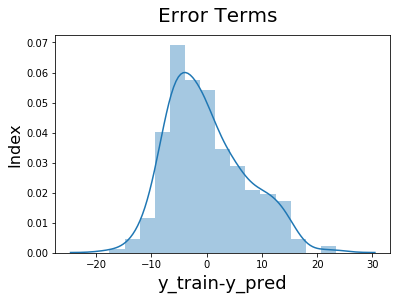

In [17]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_train-y_pred),bins=15)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_train-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)   

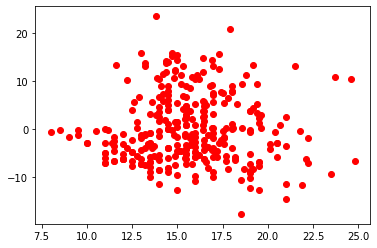

In [18]:
plt.scatter(X_train,y_train-y_pred,color='r',label='residues',marker='o')

In [19]:
test_pred=lrg.predict(X_test)

## Ex 8. Perform Accuracy check using the R Square

In [20]:
print('Mean squared error :',np.sqrt(np.mean((test_pred - y_test)**2)))

print('Variance ..........:',lrg.score(X_test,y_test))

print('R Squared error ...:',r2_score(y_test, test_pred))

Mean squared error : 7.457501800439282
Variance ..........: 0.169753710436768
R Squared error ...: 0.169753710436768


## Ex 9. Display using scatter plot the data points and the best fit line

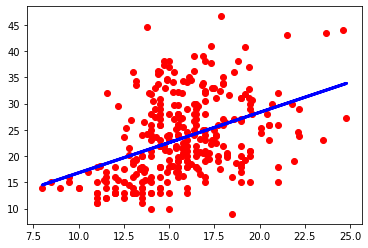

In [21]:
# Best fit line for train set
plt.scatter(X_train,y_train,color='Red')
plt.plot(X_train,y_pred,color='Blue',linewidth=3)

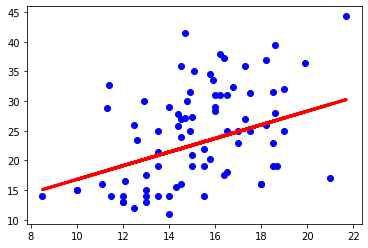

In [22]:
#Best fit line for test set
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_test,test_pred,color ='Red',linewidth=3)

# Multi-variate Regression

Repeat the above steps
BEST FIT LINE - Cost function using un-constrained method - Gradient descent

## Ex 1. Use the downloaded data


Use auto1 created from file'auto-mpg.data'

## Ex 2. Convert this data to array

In [23]:
#convert the model to array
X=np.array(auto1['acceleration']).reshape(-1,1)   # x axis taking acceleration
y=np.array(auto1['mpg'])        # y axis taking MPG

## Ex 3. Define the learning rate and no. of iterations as 0.0001 and 1000 respectively along with y-intercept and slope

In [24]:
learning_rate=0.0001
iterations=1000
m=0
c=0

## Ex 4. Create the functions to get the BEST FIT line

1. Compute error for the line given the points
2. Step gradient function
3. Gradient descent

Computer error for the given points

In [25]:
 def compute_error(X,y,m,c):
    total_error = 0
    for i in range(0,len(X)):
        total_error += (y[i] - (m * X[i] + c)) ** 2
    return total_error / float(len(X))

Step gradient function

In [26]:
def step_gradient_function(X,y, m,c,learning_rate):
    m_temp=0
    c_temp=0
    
    n=float(len(X))
    
    for i in range(0,len(X)):
        m_temp+=(2/n) * (-X[i]) * ( y[i] - ( m * X[i] + c))
        c_temp+=(2/n) * (-1) * ( y[i] - ( m * X[i] + c))
    
    m_update = m - (m_temp * learning_rate)
                                
    c_update = c - (c_temp * learning_rate )
                                
    return (m_update,c_update)

Gradient function

In [27]:
def gradient_function(m_start,c_start,X,y,learning_rate,num_itr):
    m = m_start
    c = c_start
    for i in range(num_itr):
        m,c = step_gradient_function(X,y,m,c,learning_rate)
        mse = compute_error(X,y,m,c)
        m_list.append(m)
        c_list.append(c)
        mse_list.append(mse)
    
    return (m,c)

## Ex 5. Display using scatter plot the data points and the best fit line

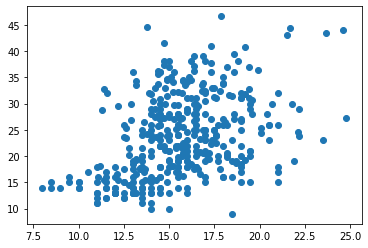

In [28]:
plt.scatter(X,y)

## Ex 6. Display the Gradient and y-intercept value in the form y = mx+c

In [29]:
 print('At Starting of gradient descent m = {0}, c = {1}, MSE = {2}'
      .format(m,c,compute_error(X,y,m,c)))

At Starting of gradient descent m = 0, c = 0, MSE = [613.87125628]


In [30]:
m_list = []
c_list = []
mse_list = []

[m_final,c_final] = gradient_function(m,c,X,y,learning_rate,iterations)

In [31]:
 print('After {0} iterations, m ={1},c={2} and MSE = {3}'
      .format(iterations,m_final,c_final,compute_error(X,y,m_final,c_final)))

After 1000 iterations, m =[1.49315099],c=[0.12252253] and MSE = [50.88527317]


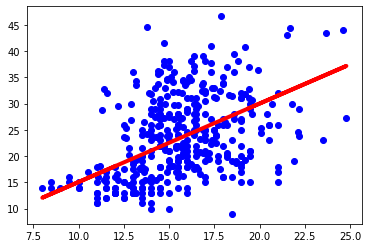

In [32]:
plt.scatter(X,y,color = 'blue')
plt.plot(X,(m_final * X + c_final),color = 'red',linewidth = 4)

## Ex 7. Find the BEST FIT line i.e., m and c of y=mx+c with least error using trial and error method i.e., modify learning rate or iterations or both

In [35]:
m_initial = 0
c_initial = 0
iterations = 3000
learning_rate = 0.001

m_list = []
c_list = []
mse_list = []

[m1,c1] = gradient_function(m_initial, c_initial,X,y, learning_rate,iterations)

print('After {0} iterations, m ={1},c={2} and MSE = {3}'
      .format(iterations,m1,c1,compute_error(X,y,m1,c1)))

After 3000 iterations, m =[1.44458723],c=[0.90213649] and MSE = [50.67434218]


In [36]:
iterations=2000
[m1,c1] = gradient_function(m_initial, c_initial, X, y, learning_rate,iterations)

# m and c values for least MSE value
m_best = 0
c_best = 0
mse_least_ind = (mse_list.index(min(mse_list)))

m_best = m_list[mse_least_ind]
c_best = c_list[mse_least_ind]

print(mse_least_ind)
print('m_best ...:',m_best)
print('c_best ...:',c_best)
print('least mse :',min(mse_list))

2999
m_best ...: [1.44458723]
c_best ...: [0.90213649]
least mse : [50.67434218]


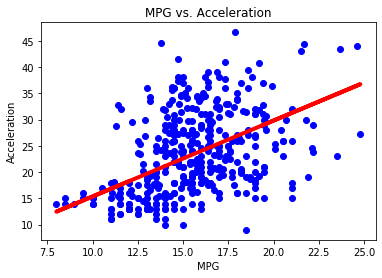

In [37]:
plt.scatter(X,y,color = 'blue')
plt.plot(X,(m_best * X + c_best),color = 'red',linewidth = 4)

plt.title('MPG vs. Acceleration')
plt.xlabel('MPG')
plt.ylabel('Acceleration')
plt.show()

# Machine Learning KNN assignments

## Ex 1. Data:
1. Download the census data file from UCI Machine Learning repository
http://archive.ics.uci.edu/ml/machine-learningdatabases/haberman/
2. Identify target variable and independent variable.
3. Prepare the data file 

In [41]:
haberman=pd.read_csv('haberman.data')

In [42]:
haberman.head()

,Age,Patient's year of operation,Number of positive axillary nodes detected,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [43]:
haberman.shape

(306, 4)

In [44]:
haberman_X=np.array(haberman.drop(['Survival status'],1))
haberman_y=np.array(haberman['Survival status'])

## Ex 2. Import relevant python libraries and sklearn KNN model 

In [45]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors

## Ex 3. Split the file into train [80%] and test [20%] data 

In [46]:
X_train,X_test,y_train,y_test=train_test_split(haberman_X,haberman_y,random_state=0,test_size=0.2)

## Ex 4. Apply KNN algorithm

In [47]:
knn=neighbors.KNeighborsClassifier()

In [48]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Ex 6. Predict using test data 

In [49]:
y_pred=knn.predict(X_test)

In [50]:
print("Predicted value for survival status")
y_pred

Predicted value for survival status


array([1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [51]:
print("Actual survival status")
y_test

Actual survival status


array([2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1], dtype=int64)

## Ex 8. Perform Accuracy check

In [52]:
from sklearn import metrics

In [53]:
knn.score(X_test,y_test)

0.6290322580645161